In [1]:

### Imports go here
import tweepy
# !pip3 install twint
#import twint
import json 
import datetime
#import geocoder
from tweepy import OAuthHandler
import csv

In [22]:
# load/read from file using JSON
secrets = json.loads(open("secrets_Xiaomi.json","r").read())

api_key = secrets['CONSUMER_KEY']
api_key_secret = secrets['CONSUMER_SECRET']
access_key = secrets['ACCESS_TOKEN_KEY']
access_key_secret = secrets['ACCESS_TOKEN_SECRET']


auth = OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_key, access_key_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

#change per brand
screen_name = "XiaomiSupport"

In [3]:
import pandas as pd

In [33]:
import csv
csvFile = open('tweet_reply_Xiaomi.csv', 'w')
counter=0

csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q='@XiaomiSupport',count=4000000,lang="en", tweet_mode='extended').items(4000):
    print (tweet.full_text)
    csvWriter.writerow([tweet.full_text.encode('utf-8')])
counter+=1

csvFile.close()

@XiaomiSupport Sabse jyada cheater website hai mi always they snatching the Money and sending the missing product
@XiaomiSupport @Xiaomi @XiaomiNigeria please respond to my DMs
@Xiaomi @XiaomiSupport @XiaomiIndonesia @atytse
My redmi note 8 pro
#productphotography https://t.co/aNeLr2TNhv
@XiaomiSupport Where is Bangladesh 😐
RT @XiaomiSupport: #HelloMiFans, want to get support from us? 
Stay tuned to Xiaomi customer support via https://t.co/bm3t2ltCcW https://t.…
@XiaomiSupport Thanks, always!  #Mi11  🥰🧡🧡🧡 #Mifans 😊
RT @XiaomiSupport: #HelloMiFans, want to get support from us? 
Stay tuned to Xiaomi customer support via https://t.co/bm3t2ltCcW https://t.…
@XiaomiSupport redmi note 4 (nikel) source code when ?
@hexwhyzid @XiaomiNigeria @Xiaomi @Xiaomi @XiaomiNigeria @XiaomiSupport please do the needful so ur filthy ass won't be dragged
@XiaomiSupport Allow #RedmiNote10Series to #ChallengeYourBoundaries with its 108MP Camera, 120Hz AMOLED, dual speakers and the sleekest designs!
 #RedmiNot

@google @GoogleIndia
@googledevs @XiaomiSupport

Your messaging app doesn't have feature to schedule SMS. Though help section does mentions about it but it seems to be for old version. Can someone help using it on @XiaomiIndia
#Mi10i

@manukumarjain

#BugInGoogleMessaging
@MiIndiaSupport Same msg I have received so many times from ur company supporting team.
How can service center close request itself without taking customer satisfaction report and feedback?
@manukumarjain @MiIndiaSupport @XiaomiSupport @Facebook @instagram @forum_consumer
RT @XiaomiSupport: Still don't know why the battery always drains fast?
Here are some #XiaomiSupportTips to help you find out the reason. h…
@XiaomiSupport please reply to my message
RT @AjeetMaurya_: Hey @manukumarjain  @XiaomiSupport
I have a Redmi Note 9 pro max. It was in well condition, not even a scratch. I was on…
@MiTVIndia @Flipkart @amazonIN @manukumarjain @MiIndiaSupport @XiaomiSupport @Facebook @instagram as replied from ur side there is 

In [4]:
df = pd.read_csv('tweet_reply_Xiaomi.csv')  
df.to_csv('analyze_tweet_reply_Xiaomi.csv', header = ['Comments'])

In [4]:
df1 = pd.read_csv('analyze_tweet_reply_Xiaomi.csv')
df1.shape

(167, 2)

In [5]:
import re
import string

def clean_text(text):
  text = re.sub('@[\w]*','',text)
  text = re.sub('\[.*?\]','',text)
  text = re.sub('[%s]'% re.escape(string.punctuation), '',text)
  text = re.sub('\w*\d\w*','',text)
  text= re.sub(r'@[A-Za-z0-9]+','',text) #remove mention
  text = re.sub('https?://[A-Za-z0-9./]+','',text) #remove https
  text = re.sub('b\w*','',text)
  return text

cleaned = lambda x: clean_text(x)

In [6]:
df1['Comments']= pd.DataFrame(df1.Comments.apply(cleaned))

In [7]:
df1

,Unnamed: 0,Comments
0,0,please respond to my DMs
1,1,nMy redmi note pronproductphotography
2,2,Where is Bangladesh
3,3,HelloMiFans want to get support from us nSta...
4,4,Thanks always Mifans
...,...,...
162,162,Want to open settings you used most quicklyn...
163,163,I need help unlocking my device not this you ...
164,164,Plz show data consumption in control centre
165,165,Want to open settings you used most quicklyn...


In [8]:
df1 = df1.drop(["Unnamed: 0"], axis=1)
df1

,Comments
0,please respond to my DMs
1,nMy redmi note pronproductphotography
2,Where is Bangladesh
3,HelloMiFans want to get support from us nSta...
4,Thanks always Mifans
...,...
162,Want to open settings you used most quicklyn...
163,I need help unlocking my device not this you ...
164,Plz show data consumption in control centre
165,Want to open settings you used most quicklyn...


In [9]:
!pip install textblob


In [10]:
from textblob import TextBlob
import nltk
# nltk.download('punkt')
# nltk.download('brown')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [11]:
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

df1['TBpolarity'] = df1['Comments'].apply(get_polarity)

In [12]:
df1

,Comments,TBpolarity
0,please respond to my DMs,0.0000
1,nMy redmi note pronproductphotography,0.0000
2,Where is Bangladesh,0.0000
3,HelloMiFans want to get support from us nSta...,0.0000
4,Thanks always Mifans,0.2000
...,...,...
162,Want to open settings you used most quicklyn...,0.2500
163,I need help unlocking my device not this you ...,0.0000
164,Plz show data consumption in control centre,0.0000
165,Want to open settings you used most quicklyn...,0.2500


In [13]:
df1['Sentiment_type']= ''
df1.loc[df1.TBpolarity>0, 'Sentiment_type']='POSITIVE'
df1.loc[df1.TBpolarity==0, 'Sentiment_type']='NEUTRAL '
df1.loc[df1.TBpolarity<0, 'Sentiment_type']='NEGATIVE'
df1.head()

,Comments,TBpolarity,Sentiment_type
0,please respond to my DMs,0.0,NEUTRAL
1,nMy redmi note pronproductphotography,0.0,NEUTRAL
2,Where is Bangladesh,0.0,NEUTRAL
3,HelloMiFans want to get support from us nSta...,0.0,NEUTRAL
4,Thanks always Mifans,0.2,POSITIVE


In [14]:
df1 = df1.drop_duplicates()

In [15]:
df1.shape

(124, 3)

In [16]:
df1['Sentiment_type'].value_counts()

NEUTRAL     59
POSITIVE    39
NEGATIVE    26
Name: Sentiment_type, dtype: int64

In [17]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

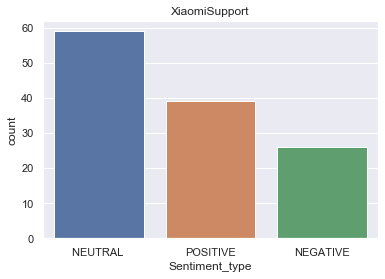

In [18]:
sns.countplot(x ='Sentiment_type',data = df1).set_title('XiaomiSupport')
plt.show()

In [19]:
# Wordcloud libraries and Tweepy API
import sys
import string
import json
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import tweepy
from tweepy import OAuthHandler
from tweepy import Cursor

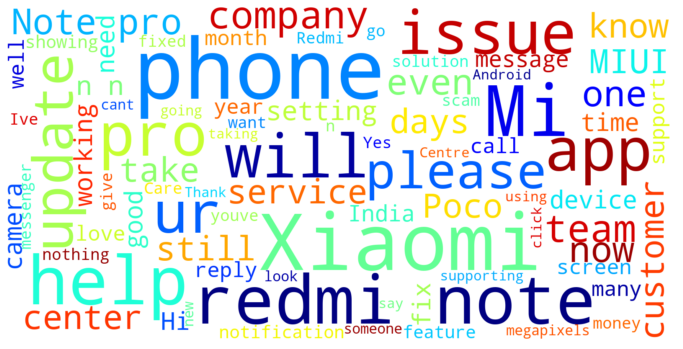

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(df1['Comments'])